In [5]:
import loristrck as lt

# Read a soundfile as a numpy array
samples, sr = lt.util.sndreadmono("trombone-e-81258.mp3")

# Analyze the soundfile with a frequency resolution of 30 Hz and 
# a window size of 40 Hz. A hoptime of 1/120 will result in 4x overlap
partials = lt.analyze(samples, sr, resolution=30, windowsize=40, 
                      hoptime=1/120)

# partials is a python list of numpy arrays
# select a subset of most significant partials
selected, noise = lt.util.select(partials, mindur=0.02, maxfreq=12000, 
                            minamp=-60)  #, minbp=2)


# now resynthesize both parts separately 
lt.util.partials_render(selected, outfile="selected.wav")
lt.util.partials_render(noise, outfile="residual.wav")

# Save the analysis as a .sdif file with RBEP format
lt.util.write_sdif(partials, "analysis.sdif")


<Axes: >

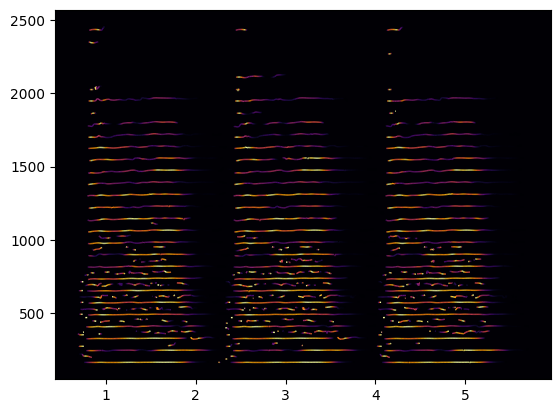

In [6]:
lt.util.plot_partials(selected)

<Axes: >

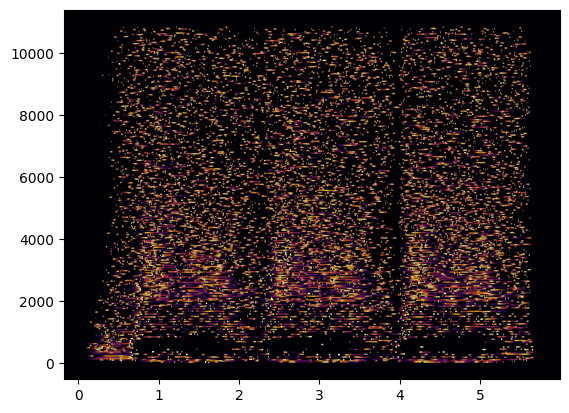

In [7]:
lt.util.plot_partials(noise)

In [9]:
def stretch(partial, factor):
    partial2 = partial.copy()
    partial2[:,0] = partial[:,0]*factor
    return partial2

stretched_partials = [stretch(partial, 20) for partial in selected]
lt.util.partials_render(stretched_partials, outfile="stretched.wav")
